### Classificador para prever a chance de uma pessoa morrer de covid.
Aluno: Jonnathan Venetillo da Silva

Mestrado Profissional em Economia e Finanças - FGV


#### Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

#### Carregando base de dados

In [2]:
df = pd.read_csv('C:\Python\covid_data.csv')

#### Sobre a base de dados

Essa base de dados foi fornecido pelo Governo Mexicano (https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico) e contém uma quantidade enorme de pacientes que estão relacionados à COVID e suas pré-condições. 
Em dados brutos são 21 características únicas e 1.048.575 pacientes únicos.  
Para dados booleanos, 1 significa "Yes" e 2 significa "No".
Valores 97 e 99 são dados faltantes.

* USMR: paciente se tratou em unidade médidas de primeiro, segundo ou terceiro nível.
* MEDICAL_UNIT: tipo de instituição do Sistema Nacional de Saúde que prestou o atendimento.
* SEX: feminino[1] e masculino[2].
* PAIIENT_TYPE: paciente foi hospitalizado ou não.
* DATE_DIED: se paciente morreu, indica a data da morte. 9999-99-99 indica que o paciente está vivo.
* INTUBED: paciente ou conectado ao ventilador ou não.
* PNEUMONIA: paciente com inflamação das vias áereas ou não.
* AGE: idade do paciente.
* PREGNANCY: paciente grávida ou não.
* DIABETES: paciente tem diabete ou não.
* COPD: indica se o paciente tem doença pulmonar obstrutiva crônica(DPOC) ou não.
* ASTHMA: paciente tem asma ou não.
* INMSUPR: paciente é imunossuprimido ou não.
* HYPERTENSION: paciente tem hipertensão ou não.
* OTHER_DISEASE: paciente tem outra doença ou não.
* CARDIOVASCULAR: paciente tem doença relacionada ao coração ou aos vasos sanguíneos.
* OBESITY: paciente é obeso ou não
* RENAL_CHRONIC: paciente tem doença renal crônica ou não.
* TOBACCO: paciente é tabagista ou não.
* CLASIFFICATION: resultados dos testes de COVID. Valores de 1-3 significam que o paciente foi diagnosticado com covid em graus diferentes. 4 ou acima significa que o paciente não foi diagnosticado com COVID ou o teste foi inconclusivo.
* ICU: paciente foi internado em uma Unidade de Terapia Intensiva(UTI) ou não.

#### Verificando os dados

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.info()
#Nossa base possui 21 colunas, apenas uma é objeto, com 1.048.575 pacientes únicos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
df.isna().sum().sum()

0

Sem valores NaN

In [6]:
df.isnull().sum().sum()

0

Sem valores faltantes, porém os valores faltantes estão classificados como 97 e 99

In [7]:
#Verificando a quantidade de valores únicos por coluna
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [8]:
#Verificando a proporção dos dados em DATE_DIED
df['DATE_DIED'].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

Nós temos 971.633 valores "9999-99-99" o que indica a quantidade de pacientes vivos. Nós vamos transformar esta categoria em booleana represetando "DEATH" que tratá paciente vivo ou morto.

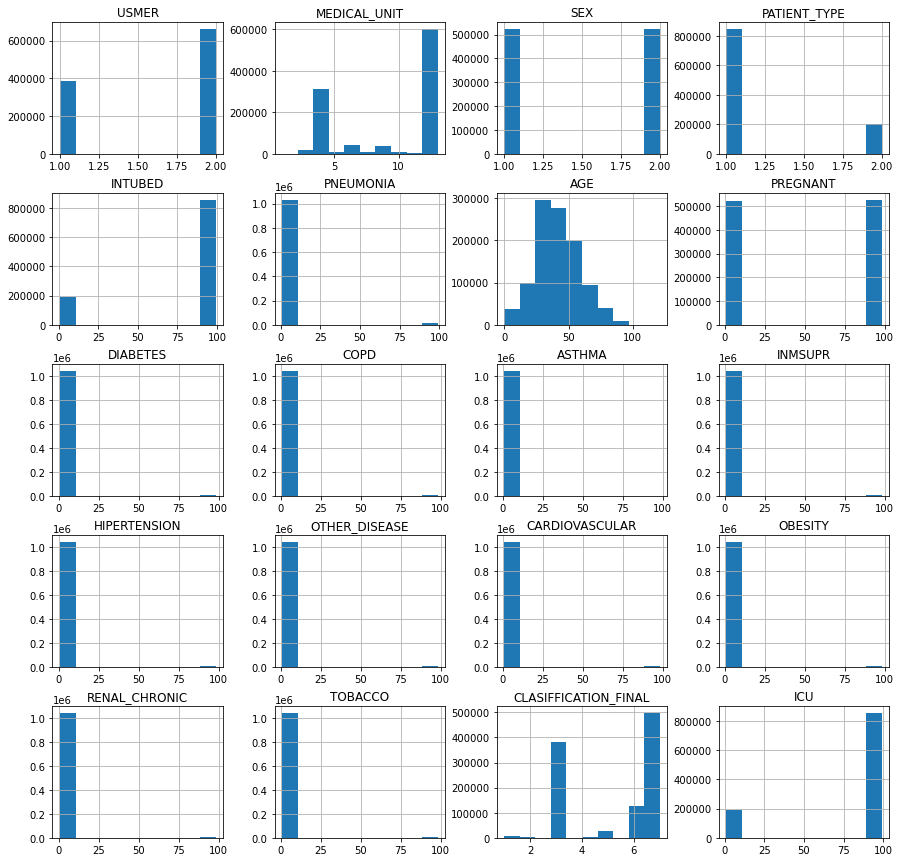

In [9]:
#Histograma de todas as categorias
df.hist(bins=10, figsize=(15,15))
plt.show()

#### Inferência

a) Existem categorias que o esperado seria apenas dois valores: 1 ou 2, contudo percebemos que essas categorias possuem 3 ou 4 valores, existindo valores próximo a 100, indicando a existência de valores classificados como 97 e/ou 99, representando valores NaN.

b) Atenção a enorme quantidade de valores NaN para as categorias "INTUBED", "PREGNANT" e "ICU". Será verificada a possibilidade de normalização ou de retirada destas categorias.

### Pré-processamento dos dados

In [10]:
#Criando a coluna DEATH
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

#Não precisamos mais da coluna DATE_DIED
df.drop(columns=["DATE_DIED"], inplace=True)

In [11]:
#Limpando os valores ausentes das categorias booleanas com mais de 2 valores, exceto "INTUBED", "PREGNANT" e "ICU"
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [12]:
#Verificando a categoria PREGNANT
df['PREGNANT'].value_counts()

97    511936
2     502200
1       7841
98      3175
Name: PREGNANT, dtype: int64

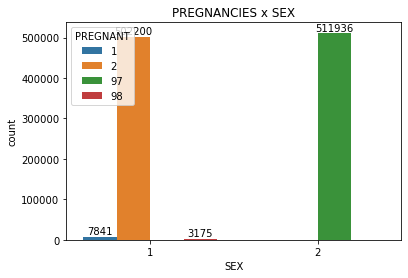

In [13]:
#PREGNANT x SEX
import seaborn as sns
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES x SEX");

#### Inferência

a) Para mulheres nós temos booleanos '1' e '2', assim como 3.175 valores _NaN_ sendo representado por '98'.

b) Temos também 511.936 homens com valor '97'. Como homem não pode engravidar, transformaremos este valor em '2'.

In [14]:
# Conversão de '97' em '2'
df.PREGNANT = df.PREGNANT.replace(97,2)

#Limpando os valores ausentes
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

In [15]:
#Verificando a categoria INTUBED
df['INTUBED'].value_counts()

97    830385
2     156451
1      32988
99      2153
Name: INTUBED, dtype: int64

In [16]:
#Verificando a categoria ICU
df['ICU'].value_counts()

97    830385
2     172875
1      16408
99      2309
Name: ICU, dtype: int64

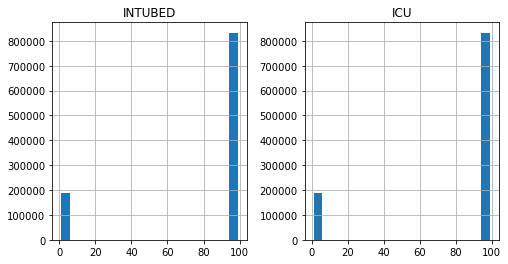

In [17]:
#Histograma INTUBED e ICU
df_ii = df[['INTUBED','ICU']]
df_ii.hist(bins=20, figsize=(8,4))
plt.show()

In [18]:
#As categorias INTUBED e ICU possuem muitos valores ausentes e não conseguimos inferir a origem dos valores '97' e '99'

#Droparemos as colunas INTUBED e ICU
df.drop(columns=["INTUBED","ICU"], inplace=True)

In [19]:
#Verificando novamente nossa base
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


Maioria das categorias em booleano e apenas a categoria AGE como numérica

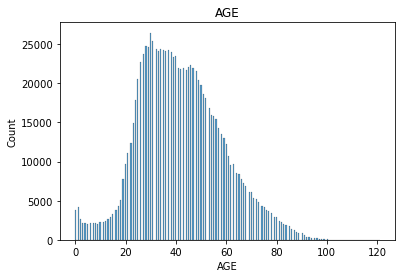

In [20]:
#Distribuição da idade
sns.histplot(x=df.AGE)
plt.title("AGE");

In [21]:
df.AGE.describe()
#Grande concentração na faixa de 30 a 53 anos

count    1.021977e+06
mean     4.189535e+01
std      1.674953e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.000000e+01
75%      5.300000e+01
max      1.210000e+02
Name: AGE, dtype: float64

### Estatística descritiva, correlação e visualização dos dados

In [22]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
count,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06,1.021977e+06
mean,1.642009e+00,8.987361e+00,1.500927e+00,1.187472e+00,1.865591e+00,4.189535e+01,1.992328e+00,1.880455e+00,1.985951e+00,1.970238e+00,1.986734e+00,1.844163e+00,1.973498e+00,1.980346e+00,1.846773e+00,1.982074e+00,1.919237e+00,5.291434e+00,1.926948e+00
std,4.794098e-01,3.724244e+00,4.999994e-01,3.902901e-01,3.410915e-01,1.674953e+01,8.725552e-02,3.244286e-01,1.176940e-01,1.699299e-01,1.144135e-01,3.627011e-01,1.606215e-01,1.388085e-01,3.602059e-01,1.326828e-01,2.724710e-01,1.889546e+00,2.602212e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00
50%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00


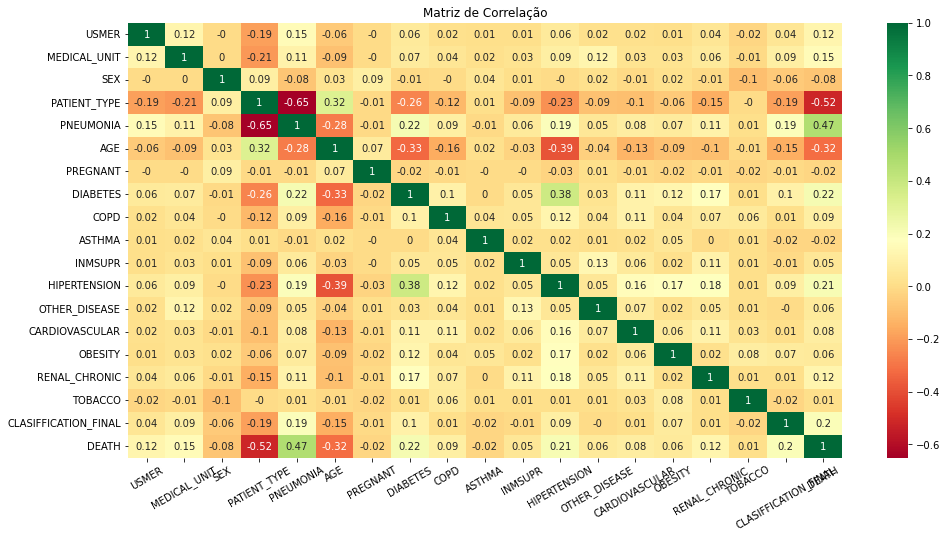

In [23]:
#Matriz de correlação
corr = df.corr()

#Mapa de calor da matriz de correlação
plt.figure(figsize = (16,8))
plt.title('Matriz de Correlação',size=12)
for item in sns.heatmap(round(corr,2), annot=True, cmap='RdYlGn').get_xticklabels():
    item.set_rotation(30)

In [24]:
#Ordem de correlação
corr["DEATH"].sort_values(ascending=False)

DEATH                   1.000000
PNEUMONIA               0.470891
DIABETES                0.217124
HIPERTENSION            0.205166
CLASIFFICATION_FINAL    0.197643
MEDICAL_UNIT            0.154430
RENAL_CHRONIC           0.119417
USMER                   0.118942
COPD                    0.089750
CARDIOVASCULAR          0.076546
OTHER_DISEASE           0.057156
OBESITY                 0.056430
INMSUPR                 0.049284
TOBACCO                 0.005154
ASTHMA                 -0.017303
PREGNANT               -0.021065
SEX                    -0.080389
AGE                    -0.322696
PATIENT_TYPE           -0.520156
Name: DEATH, dtype: float64

#### Inferências

a) Surpreendentemente existe baixa correlação entre as categorias OBESITY, INMSUPR, TOBACCO e ASTHMA, considerado como parte do grupo de risco.

b) Alta correlação para as categorias AGE, PNEUMONIA, DIABETES e HIPERTENSION, além de PATIENT_TYPE(Hospitalizado ou não hospitalizado)

In [25]:
# Criando Backup
df_backup = df.copy()

### Criando variáveis de faixa etária

In [26]:
#Iniciando nova base com novas variáveis
df2 = df.copy()

#Definindo AgeGroup, a faixa etária, devido a forte correlação com Age
def int_age(x):
        if x <= 30:
            return 'YoungTo30'
        if x <= 40:
            return 'Adult30To40'
        if x <= 53:
            return 'Adult40To53'
        return '53ToOlder'
    
df2['AgeGroup'] = df2['AGE'].apply(int_age)

In [27]:
df2['AgeGroup'].value_counts()

YoungTo30      270952
Adult40To53    268793
Adult30To40    241761
53ToOlder      240471
Name: AgeGroup, dtype: int64

Como os parametros de faixa etária foram os valores percentis, a categoria ficou bem distribuída.

In [28]:
df2.sample(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH,AgeGroup
46435,1,4,1,2,2,59,2,1,2,2,2,1,2,2,2,2,2,6,1,53ToOlder
747343,2,12,2,1,2,37,2,2,2,2,2,2,2,2,1,2,2,7,2,Adult30To40
1000050,2,12,2,1,2,25,2,2,2,2,2,2,2,2,2,2,2,7,2,YoungTo30
448352,2,12,2,2,1,51,2,2,2,2,2,2,2,2,2,2,2,3,1,Adult40To53
185029,2,4,2,1,2,41,2,2,2,2,2,2,2,2,2,2,2,6,2,Adult40To53


#### Histogramas

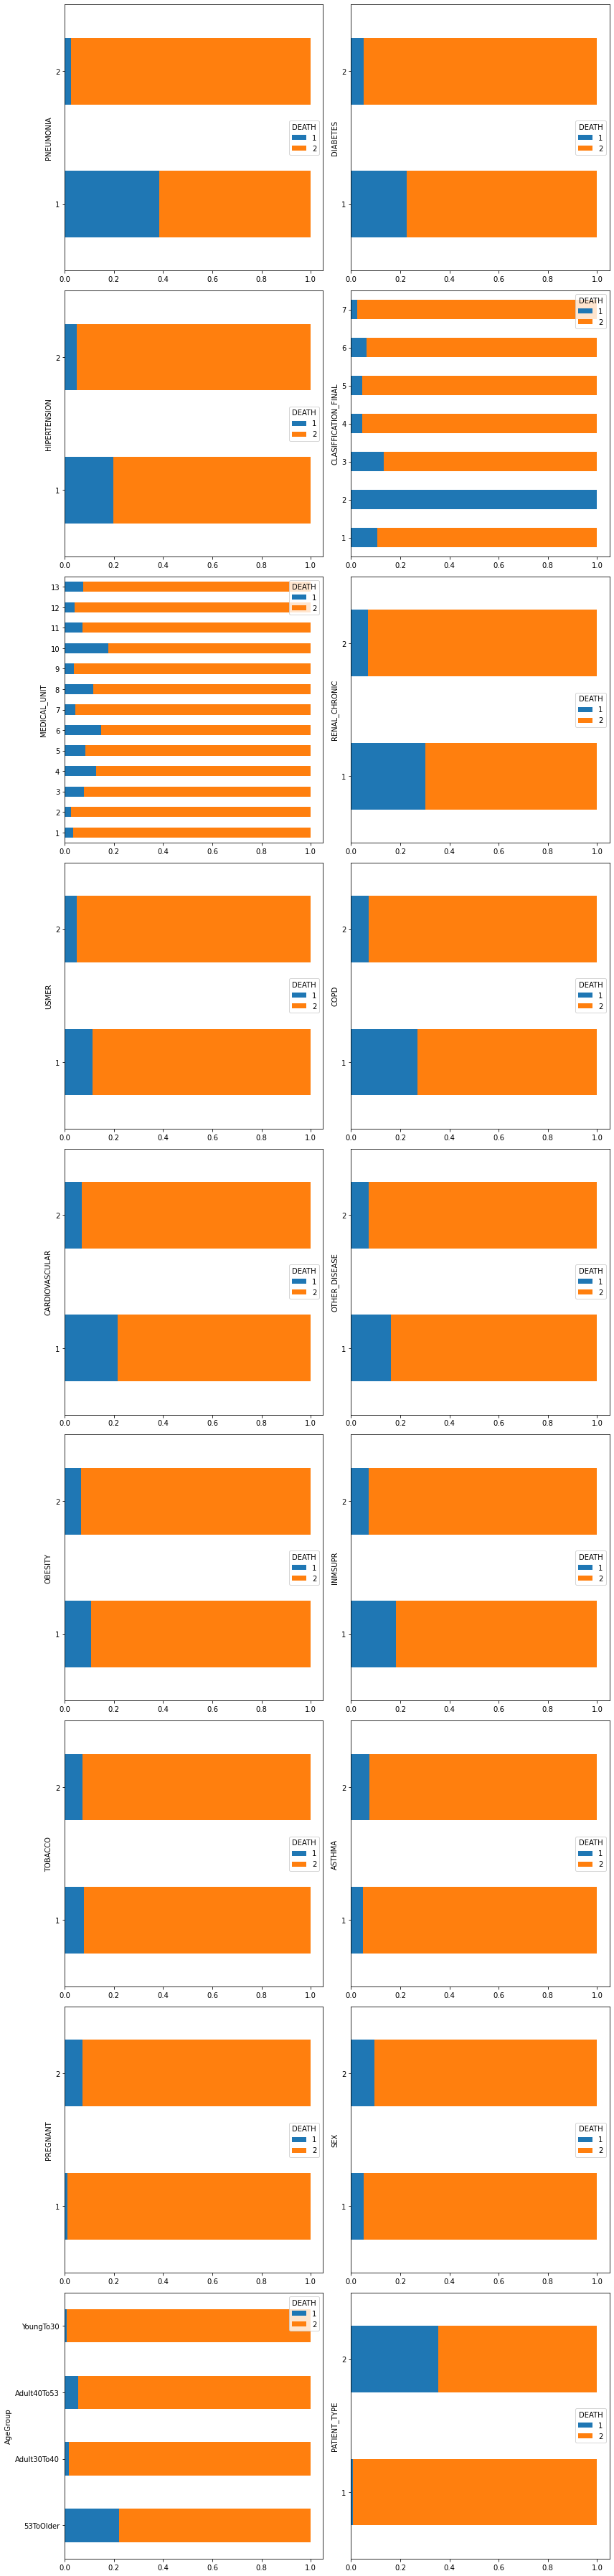

In [29]:
def custom_stack_bar_plot(df2, variavel, **kwargs):
    df2.groupby(variavel)['DEATH'].value_counts(normalize=True).unstack('DEATH').plot.barh(stacked=True, **kwargs
             )
   
fig, ax = plt.subplots(9, 2, figsize=(12, 50))
custom_stack_bar_plot(df2, 'PNEUMONIA', ax=ax[0, 0])
custom_stack_bar_plot(df2, 'DIABETES', ax=ax[0, 1])
custom_stack_bar_plot(df2, 'HIPERTENSION', ax=ax[1, 0])
custom_stack_bar_plot(df2, 'CLASIFFICATION_FINAL', ax=ax[1, 1])
custom_stack_bar_plot(df2, 'MEDICAL_UNIT', ax=ax[2, 0])
custom_stack_bar_plot(df2, 'RENAL_CHRONIC', ax=ax[2, 1])
custom_stack_bar_plot(df2, 'USMER', ax=ax[3, 0])
custom_stack_bar_plot(df2, 'COPD', ax=ax[3, 1])
custom_stack_bar_plot(df2, 'CARDIOVASCULAR', ax=ax[4, 0])
custom_stack_bar_plot(df2, 'OTHER_DISEASE', ax=ax[4, 1])
custom_stack_bar_plot(df2, 'OBESITY', ax=ax[5, 0])
custom_stack_bar_plot(df2, 'INMSUPR', ax=ax[5, 1])
custom_stack_bar_plot(df2, 'TOBACCO', ax=ax[6, 0])
custom_stack_bar_plot(df2, 'ASTHMA', ax=ax[6, 1])
custom_stack_bar_plot(df2, 'PREGNANT', ax=ax[7, 0])
custom_stack_bar_plot(df2, 'SEX', ax=ax[7, 1])
custom_stack_bar_plot(df2, 'AgeGroup', ax=ax[8, 0])
custom_stack_bar_plot(df2, 'PATIENT_TYPE', ax=ax[8, 1])


plt.tight_layout()
fig.show() 

### Machine Learning

In [30]:
#Selecionando as categorias com correlação>0.1
low_corr = df[["SEX","PREGNANT","COPD","ASTHMA","INMSUPR",
               "OTHER_DISEASE","CARDIOVASCULAR","OBESITY","TOBACCO"]]

df.drop(columns=low_corr,inplace=True)

In [31]:
df.sample(5)

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
168584,1,4,1,2,60,1,2,2,6,2
109158,2,4,1,2,36,2,2,2,3,2
359918,1,6,1,2,37,2,2,2,3,2
331080,2,4,1,2,38,2,2,2,7,2
846443,1,12,1,2,26,2,2,2,7,2


In [32]:
#Atribuindo Dummies para as categorias não binárias MEDICAL_UNIT e CLASIFFICATION_FINAL
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [33]:
#Fazendo o escalonamento dos dados com o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [34]:
df.head()

,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,DEATH,MEDICAL_UNIT_2,MEDICAL_UNIT_3,...,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,2,1,1,0.537190,2,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,0.595041,2,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2,0.454545,1,2,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,1,2,0.438017,2,2,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,2,0.561983,1,1,2,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
#Renomeando os valores de (1,2) para (0,1)
df.USMER.replace({1:0 ,2:1}, regex=True, inplace=True)
df.PATIENT_TYPE.replace({1:0 ,2:1}, regex=True, inplace=True)
df.PNEUMONIA.replace({1:0 ,2:1}, regex=True, inplace=True)
df.DIABETES.replace({1:0 ,2:1}, regex=True, inplace=True)
df.HIPERTENSION.replace({1:0 ,2:1}, regex=True, inplace=True)
df.RENAL_CHRONIC.replace({1:0 ,2:1}, regex=True, inplace=True)
df.DEATH.replace({1:0 ,2:1}, regex=True, inplace=True)

df.head()



,USMER,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,DEATH,MEDICAL_UNIT_2,MEDICAL_UNIT_3,...,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,CLASIFFICATION_FINAL_2,CLASIFFICATION_FINAL_3,CLASIFFICATION_FINAL_4,CLASIFFICATION_FINAL_5,CLASIFFICATION_FINAL_6,CLASIFFICATION_FINAL_7
0,1,0,0,0.537190,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0.595041,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0.454545,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0.438017,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0.561983,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [37]:
#Definindo X e Y
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [38]:
#Separando a base de treino e de teste
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

In [39]:
(train_x.shape, test_x.shape) 

((817581, 25), (204396, 25))

In [40]:
(train_y.shape, test_y.shape)

((817581,), (204396,))

In [41]:
#Importando modelos
import time

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

#Aplicando os modelos aprendidos em aula
modelos = {'SGDClassifier': SGDClassifier(max_iter=200, tol=1e-4, eta0=0.1, random_state=42),
           'Logistic': LogisticRegression(max_iter=200),
           'SVM': LinearSVC(C=1, loss="hinge"),
           'Tree': DecisionTreeClassifier(random_state=42,min_samples_leaf=500, max_depth=20),
           'RandomForest': RandomForestClassifier(n_estimators=200, max_leaf_nodes = 64,n_jobs = -1, random_state=42)}

resultados_crossVal = pd.DataFrame([], index = modelos.keys(), columns=['precision','recall','f1','accuracy', 'roc_auc', 'GINI'])
for nome, modelo in modelos.items():
    modelo.fit(train_x,train_y.values.ravel())
    start_time = time.time()
    cv = cross_validate(modelo, train_x, train_y.values.ravel(), scoring = ['precision','recall','f1','accuracy', 'roc_auc'])
    
    precision = cv['test_precision'].mean()
    recall = cv['test_recall'].mean()
    f1 = cv['test_f1'].mean()
    accuracy = cv['test_accuracy'].mean()
    AUROC = cv['test_roc_auc'].mean()
    GINI = 2*AUROC-1 
    
    resultados_crossVal.loc[nome,:] = precision, recall, f1, accuracy, AUROC, GINI
    modelos[nome] = modelo
    
    elapsed_time = time.time() - start_time
    print(f"{nome}: processado em {elapsed_time:.3f} segundos")

resultados_crossVal.sort_values('roc_auc',ascending=False)

SGDClassifier: processado em 11.634 segundos
Logistic: processado em 61.280 segundos
SVM: processado em 14.961 segundos
Tree: processado em 13.985 segundos
RandomForest: processado em 131.905 segundos


,precision,recall,f1,accuracy,roc_auc,GINI
RandomForest,0.950583,0.986227,0.968077,0.939719,0.958401,0.916802
Tree,0.958029,0.977931,0.967877,0.93984,0.95713,0.914259
Logistic,0.958135,0.977542,0.967741,0.9396,0.955997,0.911994
SGDClassifier,0.952472,0.983923,0.96794,0.939594,0.951135,0.902271
SVM,0.954376,0.982197,0.968087,0.939984,0.950984,0.901969


#### Resultado para os dados de treino
_Gini, KS e a Curva ROC_

SGDClassifier: processado em 5.133 segundos
Logistic: processado em 17.015 segundos
SVM: processado em 5.145 segundos
Tree: processado em 1.691 segundos
RandomForest: processado em 3.616 segundos


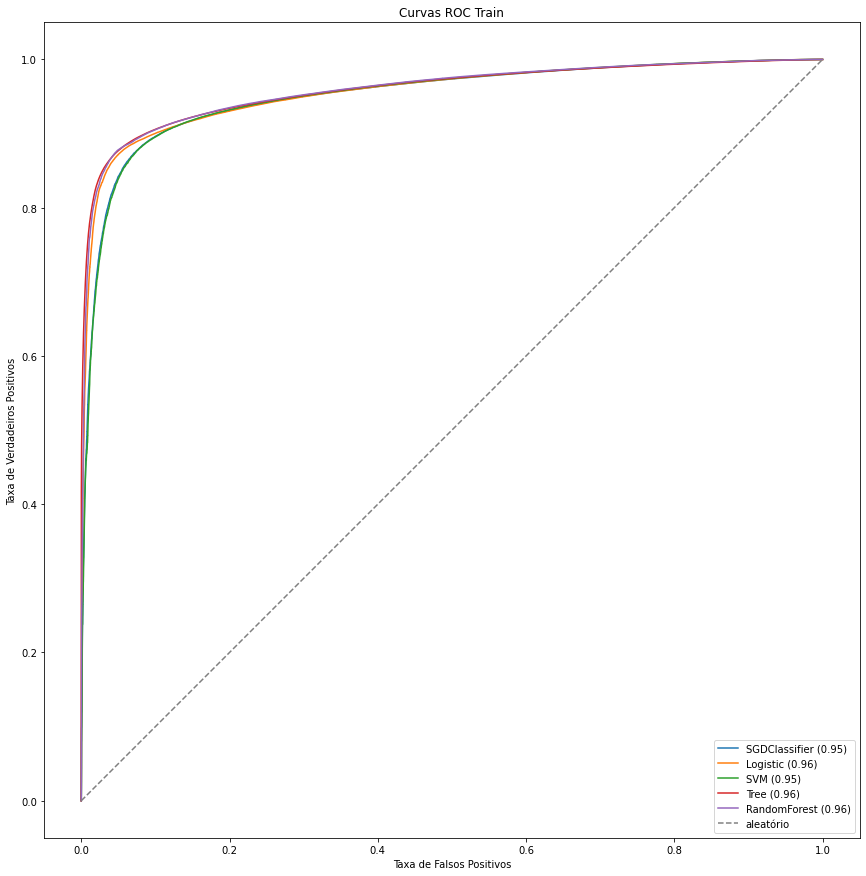

,precision,recall,f1,accuracy,roc_auc,GINI,KS_s,KS_p
Tree,0.958288,0.977989,0.968038,0.940148,0.959442,0.918884,0.019054,0.0
RandomForest,0.950983,0.98598,0.968166,0.939907,0.95871,0.91742,0.034107,0.0
Logistic,0.9581,0.977611,0.967757,0.939627,0.955987,0.911975,0.018873,0.0
SGDClassifier,0.952679,0.983823,0.968001,0.939717,0.951043,0.902087,0.030297,0.0
SVM,0.954341,0.982267,0.968103,0.940011,0.95095,0.901901,0.027119,0.0


In [42]:
from sklearn.model_selection import cross_val_predict
from scipy.stats import ks_2samp

resultados_train = pd.DataFrame([], index = modelos.keys(), 
                          columns=['precision','recall','f1','accuracy', 'roc_auc', 'GINI','KS_s', 'KS_p'])

plt.figure(figsize=(20,15))

for nome, modelo in modelos.items():
    ypred = modelo.predict(train_x)
    start_time = time.time()
    
    if nome == 'Tree'or nome == 'RandomForest':
        y_scores = modelo.predict_proba(train_x)[:,1]
    else:
        y_scores = cross_val_predict(modelo, train_x, train_y.values.ravel(), cv=2, method="decision_function")
        
    precision = precision_score(train_y, ypred)
    recall = recall_score(train_y, ypred)
    f1 = f1_score(train_y, ypred)
    accuracy = accuracy_score(train_y, ypred)
    auc = roc_auc_score(train_y, y_scores)
    GINI = 2*auc-1 
    
    KS_s, KS_p = ks_2samp(train_y.values.ravel(), ypred) 
    
    resultados_train.loc[nome,:] = precision, recall, f1, accuracy, auc, GINI, KS_s, KS_p
    
    fpr, tpr, _ = roc_curve(train_y, y_scores)
    plt.plot(fpr, tpr, label=f'{nome} ({auc:.2f})')
    
    modelos[nome] = modelo

    elapsed_time = time.time() - start_time
    print(f"{nome}: processado em {elapsed_time:.3f} segundos")
    
plt.title('Curvas ROC Train')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.plot([0,1],[0,1], c='gray', linestyle='dashed', label='aleatório')
plt.legend()
plt.axis('square')
plt.show()


    
resultados_train.sort_values('roc_auc',ascending=False)

#### Resultado para os dados de teste
_Gini, KS e a Curva ROC_

SGDClassifier: processado em 1.555 segundos
Logistic: processado em 3.182 segundos
SVM: processado em 1.060 segundos
Tree: processado em 0.417 segundos
RandomForest: processado em 1.012 segundos


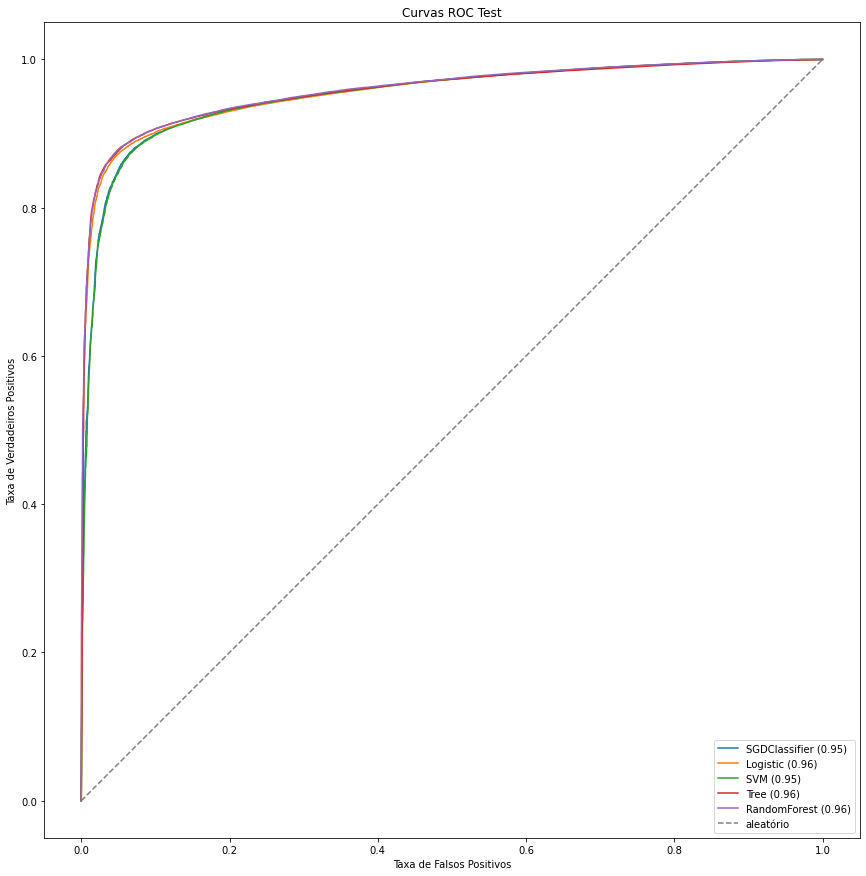

,precision,recall,f1,accuracy,roc_auc,GINI,KS_s,KS_p
RandomForest,0.950976,0.985875,0.968111,0.939754,0.958574,0.917148,0.034042,0.0
Tree,0.957964,0.977579,0.967672,0.939412,0.957102,0.914203,0.018993,0.0
Logistic,0.958011,0.977515,0.967665,0.939402,0.956279,0.912557,0.018885,0.0
SGDClassifier,0.952796,0.983708,0.968005,0.939681,0.951971,0.903943,0.030094,0.0
SVM,0.954332,0.982041,0.967988,0.939749,0.951487,0.902974,0.026933,0.0


In [43]:
resultados_test = pd.DataFrame([], index = modelos.keys(), 
                          columns=['precision','recall','f1','accuracy', 'roc_auc', 'GINI','KS_s', 'KS_p'])

plt.figure(figsize=(20,15))

for nome, modelo in modelos.items():
    ypred = modelo.predict(test_x)
    start_time = time.time()
    
    if nome == 'Tree'or nome == 'RandomForest':
        y_scores = modelo.predict_proba(test_x)[:,1]
    else:
        y_scores = cross_val_predict(modelo, test_x, test_y.values.ravel(), cv=2, method="decision_function")
        
    precision = precision_score(test_y, ypred)
    recall = recall_score(test_y, ypred)
    f1 = f1_score(test_y, ypred)
    accuracy = accuracy_score(test_y, ypred)
    auc = roc_auc_score(test_y, y_scores)
    GINI = 2*auc-1 
    
    KS_s, KS_p = ks_2samp(test_y.values.ravel(), ypred) 
    
    resultados_train.loc[nome,:] = precision, recall, f1, accuracy, auc, GINI, KS_s, KS_p
    
    fpr, tpr, _ = roc_curve(test_y, y_scores)
    plt.plot(fpr, tpr, label=f'{nome} ({auc:.2f})')
    
    modelos[nome] = modelo

    elapsed_time = time.time() - start_time
    print(f"{nome}: processado em {elapsed_time:.3f} segundos")
    
plt.title('Curvas ROC Test')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.plot([0,1],[0,1], c='gray', linestyle='dashed', label='aleatório')
plt.legend()
plt.axis('square')
plt.show()


    
resultados_train.sort_values('roc_auc',ascending=False)

#### Random Forest foi o classificador com melhor resultado nos validadores em teste e um dos melhores no treino e foi o modelo escolhido como finalista

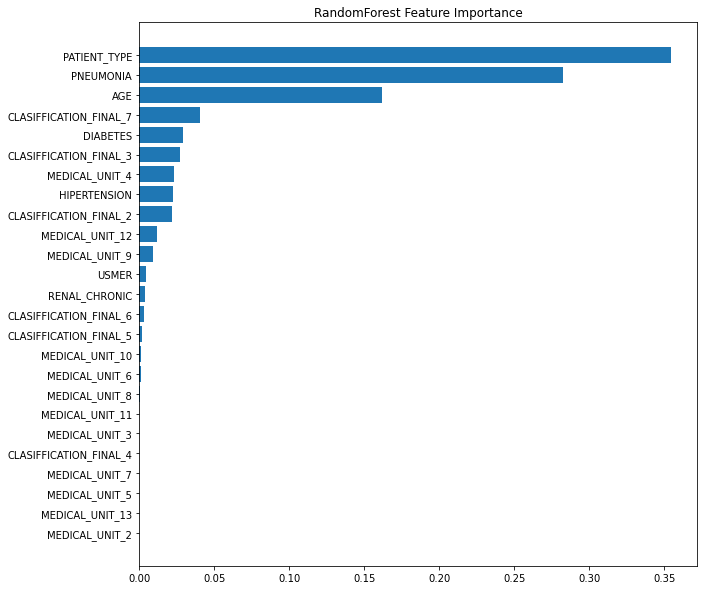

In [54]:
for nome in ['RandomForest']:
    sorted_idx = modelos[nome].feature_importances_.argsort()
    plt.figure(figsize=(10,10))
    plt.barh(train_x.columns.values[sorted_idx], modelos[nome].feature_importances_[sorted_idx])
    plt.title(nome + ' Feature Importance')
    plt.show();

Os valores foram próximos entre os Regressores e os Classificadores

#### Reduzindo a dimensionalidade através do PCA

In [55]:
#Importando modelo e aplicando a manutenção de 85% de variância sobre o X_train
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
X_train_r = pca.fit_transform(train_x)

In [56]:
#Componentes principais do modelo
pca.components_

array([[-1.81426223e-01,  2.66032293e-01, -1.89938446e-01,
         5.13213840e-02, -1.08617796e-01, -1.25875989e-01,
        -1.88966925e-02, -4.22945152e-05,  9.89547097e-03,
         3.94601480e-01,  3.10022834e-03,  2.86710322e-02,
         3.31223299e-04,  7.53940898e-03,  1.09732882e-02,
         4.69740524e-03,  4.09776356e-03, -4.64220451e-01,
         3.90293422e-04,  2.65915755e-03,  4.34380097e-01,
        -1.23781007e-03,  7.02957059e-04,  7.61232059e-02,
        -5.12595719e-01],
       [-6.71422882e-02,  1.96128680e-02,  3.98191158e-02,
        -1.10726649e-02,  1.26697761e-02, -2.03416084e-03,
        -8.42307764e-03,  1.93188678e-04,  5.05045508e-03,
         4.92132577e-01,  1.84664006e-03,  1.13052204e-02,
         1.35056767e-04,  1.59712491e-03,  1.31613336e-02,
         4.84016234e-04, -2.28572668e-03, -5.24131859e-01,
         3.97205743e-04,  1.65199790e-03, -5.21612737e-01,
        -2.94952343e-03, -6.45820740e-03,  9.07252932e-02,
         4.42213254e-01],
    

In [57]:
pca.explained_variance_ratio_

array([0.26009854, 0.18515862, 0.12900805, 0.10596667, 0.0731115 ,
       0.06490199, 0.03915086])

7 vetores necessários para o objetivo de 85% de variância preservada.

In [58]:
pca.explained_variance_ratio_.sum()


0.8573962265313061

85,73% de variância preservada através do PCA. Muito próximo da meta definida.

### Refazendo os modelos utilizando o PCA

In [59]:
#Ajustando a fitagem de modelo e a validação cruzada
modelos = {'SGDClassifier': SGDClassifier(max_iter=200, tol=1e-4, eta0=0.1, random_state=42),
           'Logistic': LogisticRegression(max_iter=200),
           'SVM': LinearSVC(C=1, loss="hinge"),
           'Tree': DecisionTreeClassifier(random_state=42,min_samples_leaf=500, max_depth=20),
           'RandomForest': RandomForestClassifier(n_estimators=200, max_leaf_nodes = 64,n_jobs = -1, random_state=42)}

resultados_crossVal = pd.DataFrame([], index = modelos.keys(), columns=['precision','recall','f1','accuracy', 'roc_auc', 'GINI'])
for nome, modelo in modelos.items():
    modelo.fit(X_train_r,train_y.values.ravel())
    start_time = time.time()
    cv = cross_validate(modelo, X_train_r, train_y.values.ravel(), scoring = ['precision','recall','f1','accuracy', 'roc_auc'])
    
    precision = cv['test_precision'].mean()
    recall = cv['test_recall'].mean()
    f1 = cv['test_f1'].mean()
    accuracy = cv['test_accuracy'].mean()
    AUROC = cv['test_roc_auc'].mean()
    GINI = 2*AUROC-1 
    
    resultados_crossVal.loc[nome,:] = precision, recall, f1, accuracy, AUROC, GINI
    modelos[nome] = modelo
    
    elapsed_time = time.time() - start_time
    print(f"{nome}: processado em {elapsed_time:.3f} segundos")

resultados_crossVal.sort_values('roc_auc',ascending=False)

SGDClassifier: processado em 7.665 segundos
Logistic: processado em 4.294 segundos
SVM: processado em 8.688 segundos
Tree: processado em 23.736 segundos
RandomForest: processado em 197.216 segundos


,precision,recall,f1,accuracy,roc_auc,GINI
Tree,0.955842,0.97878,0.967175,0.938426,0.954694,0.909388
RandomForest,0.953083,0.981641,0.967151,0.938199,0.952593,0.905186
Logistic,0.953305,0.975339,0.964196,0.932868,0.946351,0.892702
SGDClassifier,0.926786,1.0,0.962002,0.926786,0.942734,0.885468
SVM,0.926786,1.0,0.962002,0.926786,0.861493,0.722986


SGDClassifier: processado em 3.382 segundos
Logistic: processado em 2.709 segundos
SVM: processado em 3.231 segundos
Tree: processado em 1.569 segundos
RandomForest: processado em 3.729 segundos


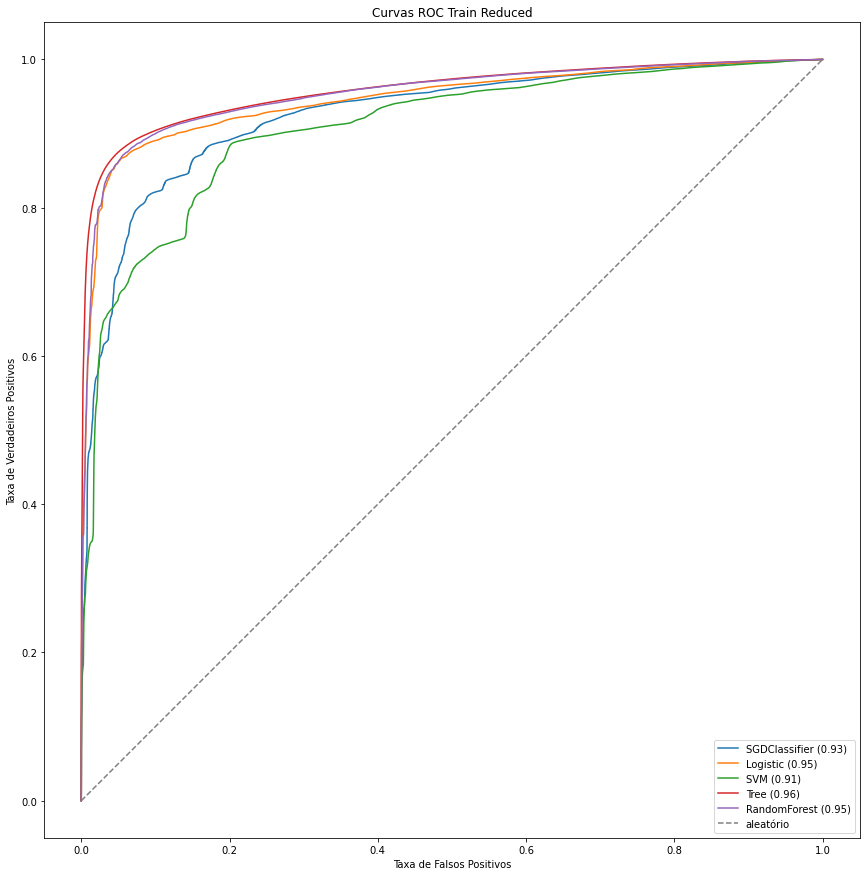

,precision,recall,f1,accuracy,roc_auc,GINI,KS_s,KS_p
Tree,0.957559,0.977934,0.967639,0.939378,0.957943,0.915885,0.01972,0.0
RandomForest,0.953713,0.981671,0.96749,0.938857,0.953273,0.906546,0.027169,0.0
Logistic,0.953329,0.975333,0.964205,0.932886,0.946323,0.892646,0.021391,0.0
SGDClassifier,0.926786,1.0,0.962002,0.926786,0.925383,0.850766,0.073214,0.0
SVM,0.926786,1.0,0.962002,0.926786,0.907216,0.814432,0.073214,0.0


In [61]:
#Resultado de treino com PCA
resultados_train_r = pd.DataFrame([], index = modelos.keys(), 
                          columns=['precision','recall','f1','accuracy', 'roc_auc', 'GINI','KS_s', 'KS_p'])

plt.figure(figsize=(20,15))

for nome, modelo in modelos.items():
    ypred = modelo.predict(X_train_r)
    start_time = time.time()
    
    if nome == 'Tree'or nome == 'RandomForest':
        y_scores = modelo.predict_proba(X_train_r)[:,1]
    else:
        y_scores = cross_val_predict(modelo, X_train_r, train_y.values.ravel(), cv=2, method="decision_function")
        
    precision = precision_score(train_y, ypred)
    recall = recall_score(train_y, ypred)
    f1 = f1_score(train_y, ypred)
    accuracy = accuracy_score(train_y, ypred)
    auc = roc_auc_score(train_y, y_scores)
    GINI = 2*auc-1 
    
    KS_s, KS_p = ks_2samp(train_y.values.ravel(), ypred) 
    
    resultados_train_r.loc[nome,:] = precision, recall, f1, accuracy, auc, GINI, KS_s, KS_p
    
    fpr, tpr, _ = roc_curve(train_y, y_scores)
    plt.plot(fpr, tpr, label=f'{nome} ({auc:.2f})')
    
    modelos[nome] = modelo

    elapsed_time = time.time() - start_time
    print(f"{nome}: processado em {elapsed_time:.3f} segundos")
    
plt.title('Curvas ROC Train Reduced')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.plot([0,1],[0,1], c='gray', linestyle='dashed', label='aleatório')
plt.legend()
plt.axis('square')
plt.show()


    
resultados_train_r.sort_values('roc_auc',ascending=False)

Todos os modelos rodaram bem mais rápido, com exceção do RandomForest.

Decision Tree passou a ser o resultado com mais Acurácia, contudo, RandomForest continuou sendo uma modelo com ótimos resultados.

Diferença centesimal nos resultados Precisão, Revocação, F1 Score, AUROC, Gini e KS.